**Learning curve** is a handy utility that demonstrates how model performance depends on training dataset size

**Scalability curve** - how <u>fitting time</u> depends on training data size.
- If it's linear => model scales good (no need to )
- If it's polynomial => model scales bad.

Both curves help determine the optimal training dataset characteristics

#### Sklearn implementation

In scikit-learn there is a convenient function

[sklearn.model_selection.learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

that computes stepwise performance (with cross-validation for better estimates). 

These performance values then can be easily plotted.

sklearn.model_selection.learning_curve(estimator, X, y, cv, scoring, train_sizes, return_times)
- _estimator_ - a model to train
- *X* - features
- *y* - target
- *cv* - cross validator class 
- *scoring* - validation metric
- *train_sizes* - list of to try
- *return_times* - whether to compute fitting/scoring times

Let's load some data

In [59]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OrdinalEncoder
bunch = fetch_openml(name="abalone", as_frame=True, version=2)

X = bunch['data'].iloc[:,1:]
y = OrdinalEncoder().fit_transform(bunch['target'].to_frame("y"))[:,0]

X.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [52]:
import pandas as pd
pd.Series(y).value_counts(dropna=False)

1.0    2096
0.0    2081
dtype: int64

Let's code a wrapper function that plots 2 curves for any estimator and training dataset

In [62]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def get_curve(estimator, model_name, X, y, scoring):
  
  train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(estimator, X=X, y=y, scoring=scoring, return_times=True)
  
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)
  
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  
  axes[0].grid()
  axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                           train_scores_mean + train_scores_std, alpha=0.1,
                           color="r")
  axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                           test_scores_mean + test_scores_std, alpha=0.1,
                           color="g")
  axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                   label="Training score")
  axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                   label="Cross-validation score")
  axes[0].legend(loc="best")
  axes[0].set_title("{}".format(model_name))

  axes[1].grid()
  axes[1].plot(train_sizes, fit_times_mean, 'o-')
  axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                           fit_times_mean + fit_times_std, alpha=0.1)
  axes[1].set_xlabel("Training examples")
  axes[1].set_ylabel("fit_times")
  axes[1].set_title("Model Scalability")
  
  return -1



-1

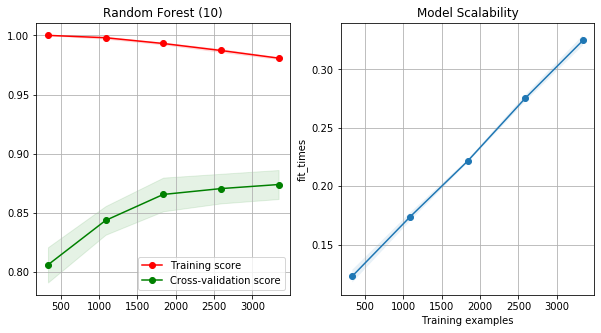

In [68]:
model3 = RandomForestClassifier(max_depth=10, n_estimators=100)
get_curve(model3, "Random Forest (10)", X, y, scoring="roc_auc")

-1

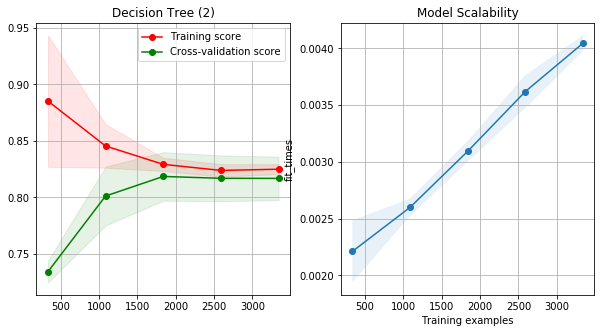

In [67]:
model4 = DecisionTreeClassifier(max_depth=2)
get_curve(model4, "Decision Tree (2)", X, y, scoring='roc_auc')

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


def get_curve(estimator, model_name):
  
  train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(estimator, X=X, y=y, scoring='accuracy', return_times=True)
  
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)
  
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  
  axes[0].grid()
  axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                           train_scores_mean + train_scores_std, alpha=0.1,
                           color="r")
  axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                           test_scores_mean + test_scores_std, alpha=0.1,
                           color="g")
  axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                   label="Training score")
  axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                   label="Cross-validation score")
  axes[0].legend(loc="best")
  axes[0].set_title("{}".format(model_name))

  axes[1].grid()
  axes[1].plot(train_sizes, fit_times_mean, 'o-')
  axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                           fit_times_mean + fit_times_std, alpha=0.1)
  axes[1].set_xlabel("Training examples")
  axes[1].set_ylabel("fit_times")
  axes[1].set_title("Scalability of the model")
  
  return -1



model3 = RandomForestClassifier(max_depth=10, n_estimators=100)
get_curve(model3, "Random Forest (10)")

model4 = DecisionTreeClassifier(max_depth=2)
get_curve(model4, "Decision Tree (2)")